In [1]:
import json
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt

In [2]:
from bellek.dvc.experiment import load_experiments

experiments = load_experiments('./prompt-comparison.json')
print(f"{len(experiments)} experiments")
experiments[0]

75 experiments


{'commit': 'workspace',
 'id': 'workspace',
 'name': None,
 'params': {'dataset': {'path': 'bdsaglam/musique',
   'name': 'answerable',
   'split': 'validation'},
  'qa': {'prompt': 'standard', 'model': 'llama-3-70b-tgi', 'temperature': 0.7},
  'run': 1},
 'metrics': {'exact_match': 0.5, 'f1': 0.6599999999999999, 'fuzzy_match': 0.7}}

In [3]:
df = (
    pd.json_normalize(experiments)
    .sort_values(["params.qa.model", "params.qa.prompt", "params.qa.temperature", "params.run"])
    .drop(columns=["commit", "id"])
)
dataset_path = "bdsaglam/musique"
mask = (df["params.dataset.path"] == dataset_path) & (df["params.dataset.split"] == "validation")
df = df.loc[mask].reset_index(drop=True)
df.drop_duplicates(inplace=True)
df

,name,params.dataset.path,params.dataset.name,params.dataset.split,params.qa.prompt,params.qa.model,params.qa.temperature,params.run,metrics.exact_match,metrics.f1,metrics.fuzzy_match
0,inane-yate,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.1,1,0.371949,0.440146,0.416632
1,socko-fees,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.1,1,0.371949,0.440146,0.416632
2,dormy-gang,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.1,2,0.371121,0.438157,0.414977
3,wally-stob,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.1,3,0.364915,0.433579,0.407530
4,extra-ciao,bdsaglam/musique,answerable,validation,cot-fs,llama-3-70b-tgi,0.5,1,0.362019,0.429637,0.408357
...,...,...,...,...,...,...,...,...,...,...,...
70,drear-uvea,bdsaglam/musique,answerable,validation,standard,llama-3-70b-tgi,1.0,1,0.525859,0.641445,0.589160
71,farci-debt,bdsaglam/musique,answerable,validation,standard,llama-3-70b-tgi,1.0,1,0.525859,0.641445,0.589160
72,party-roam,bdsaglam/musique,answerable,validation,standard,llama-3-70b-tgi,1.0,2,0.526272,0.644234,0.592884
73,shaky-tugs,bdsaglam/musique,answerable,validation,standard,llama-3-70b-tgi,1.0,3,0.522962,0.638086,0.587091


In [4]:
metric_cols = [col for col in df.columns if col.startswith("metrics.")]

In [5]:
df.drop(
    columns=["name", "params.dataset.path", "params.dataset.name", "params.dataset.split", "params.qa.model"]
).groupby(["params.qa.prompt", "params.qa.temperature"]).aggregate(["mean", "max", "count"]).loc[:, metric_cols]

metrics.exact_match                  \
                                                      mean       max count   
params.qa.prompt params.qa.temperature                                       
cot-fs           0.1                              0.369983  0.371949     4   
                 0.5                              0.369218  0.377327     5   
                 0.7                              0.370542  0.377327     5   
                 1.0                              0.361192  0.366984     5   
cot-zs           0.1                              0.361192  0.364501     5   
                 0.5                              0.363095  0.368225     5   
                 0.7                              0.354903  0.357882     5   
                 1.0                              0.343070  0.350021     5   
cte              0.1                              0.636243  0.638395     5   
                 0.5                              0.631499  0.632602     3   
                 0.7                              0.636326  0.639222     3   
                 1.0                              0.622121  0.622673     3   
standard         0.1                              0.543373  0.544063     6   
                 0.5                              0.536533  0.541167     5   
                 0.7                              0.529210  0.539098     5   
                 1.0                              0.524783  0.526272     5   

                                       metrics.f1                  \
                                             mean       max count   
params.qa.prompt params.qa.temperature                              
cot-fs           0.1                     0.438007  0.440146     4   
                 0.5                     0.435770  0.440525     5   
                 0.7                     0.441200  0.443775     5   
                 1.0                     0.429792  0.436727     5   
cot-zs           0.1                     0.435096  0.438870     5   
                 0.5                     0.436414  0.442912     5   
                 0.7                     0.429536  0.432154     5   
                 1.0                     0.415008  0.420435     5   
cte              0.1                     0.741937  0.743800     5   
                 0.5                     0.738394  0.739682     3   
                 0.7                     0.740226  0.742647     3   
                 1.0                     0.735057  0.736246     3   
standard         0.1                     0.651989  0.652452     6   
                 0.5                     0.649005  0.650146     5   
                 0.7                     0.651251  0.660000     5   
                 1.0                     0.640659  0.644234     5   

                                       metrics.fuzzy_match                  
                                                      mean       max count  
params.qa.prompt params.qa.temperature                                      
cot-fs           0.1                              0.413943  0.416632     4  
                 0.5                              0.414067  0.422838     5  
                 0.7                              0.416301  0.419942     5  
                 1.0                              0.405213  0.412909     5  
cot-zs           0.1                              0.405296  0.407944     5  
                 0.5                              0.405710  0.407944     5  
                 0.7                              0.397849  0.398842     5  
                 1.0                              0.385850  0.388498     5  
cte              0.1                              0.692760  0.694249     5  
                 0.5                              0.689008  0.689698     3  
                 0.7                              0.690663  0.692594     3  
                 1.0                              0.680320  0.681837     3  
standard         0.1                              0.607916  0.609847     6  
            

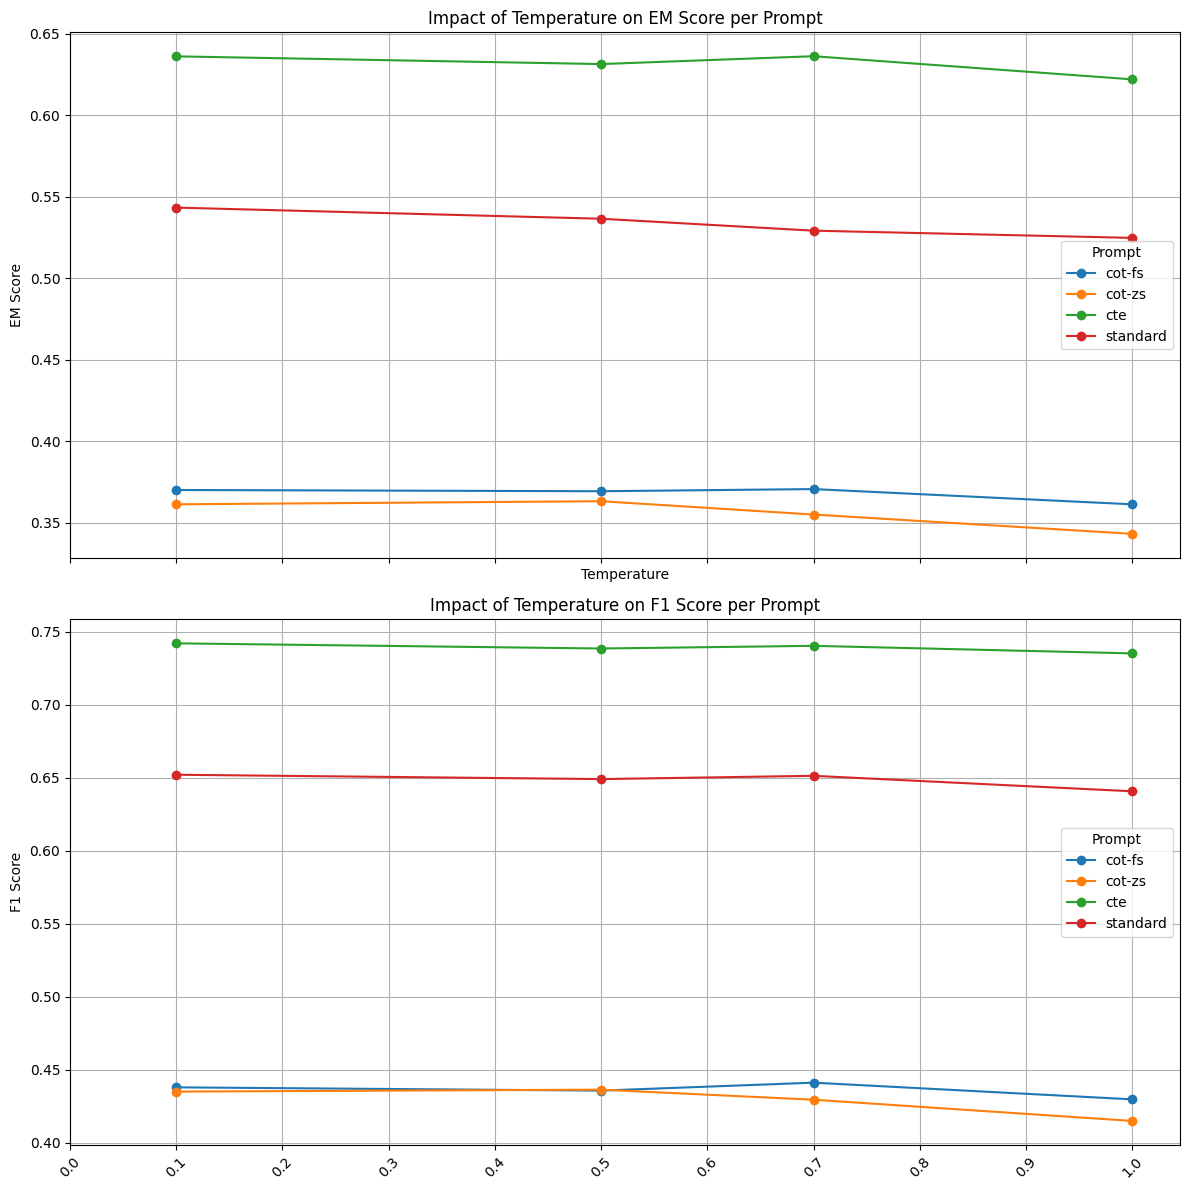

In [27]:
# Average metrics over repeated runs (params.run)
df_avg = df.groupby(["params.qa.prompt", "params.qa.temperature"])[metric_cols].mean().reset_index()

# Plotting the impact of temperature per prompt for both F1 and EM scores
prompts = df_avg["params.qa.prompt"].unique()

fig, axs = plt.subplots(2, 1, figsize=(12, 12), sharex=True)

for prompt in prompts:
    subset = df_avg[df_avg["params.qa.prompt"] == prompt]
    
    # Plot EM scores
    axs[0].plot(subset["params.qa.temperature"], subset["metrics.exact_match"], marker="o", label=prompt)
    
    # Plot F1 scores
    axs[1].plot(subset["params.qa.temperature"], subset["metrics.f1"], marker="o", label=prompt)
    

# Set labels and titles for F1 subplot
axs[0].set_xlabel("Temperature")
axs[0].set_ylabel("EM Score")
axs[0].set_title("Impact of Temperature on EM Score per Prompt")
axs[0].legend(title="Prompt", loc='best')
axs[0].grid(True)

# Set labels and titles for EM subplot
axs[1].set_ylabel("F1 Score")
axs[1].set_title("Impact of Temperature on F1 Score per Prompt")
axs[1].legend(title="Prompt", loc='best')
axs[1].grid(True)

# Set x-ticks for temperature values
plt.xticks(ticks=list(np.arange(0, 1.1, 0.1)), rotation=45)

plt.tight_layout()
plt.show()

In [7]:
# To compare the prompts at the best temperature
# Assuming "best temperature" is defined as the one with the highest average F1 score
df_best_temp = (
    df_avg.loc[df_avg.groupby("params.qa.prompt")["metrics.f1"].idxmax()]
    .set_index("params.qa.prompt", drop=False)
    .loc[["standard", "cot-zs", "cot-fs", "cte"]]
    .copy()
)
df_best_temp

,params.qa.prompt,params.qa.temperature,metrics.exact_match,metrics.f1,metrics.fuzzy_match
params.qa.prompt,,,,,
standard,standard,0.1,0.543373,0.651989,0.607916
cot-zs,cot-zs,0.5,0.363095,0.436414,0.405710
cot-fs,cot-fs,0.7,0.370542,0.441200,0.416301
cte,cte,0.1,0.636243,0.741937,0.692760


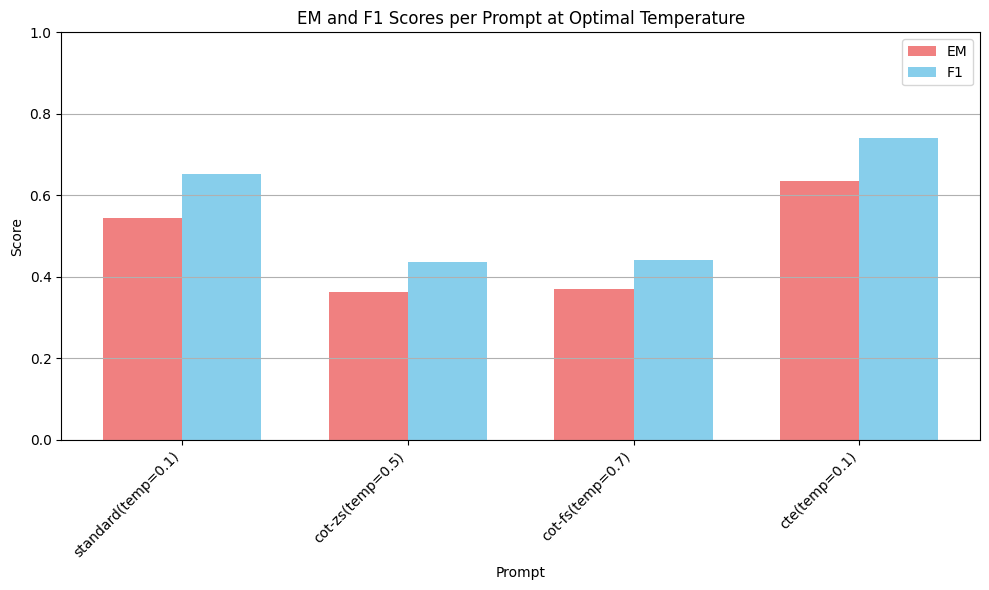

In [8]:
# Plotting EM and F1 scores together per prompt with temperature annotations
plt.figure(figsize=(10, 6))

# Create x-tick labels that include both the prompt and temperature
xs = [
    f"{prompt}(temp={temperature})"
    for prompt, temperature in zip(
        df_best_temp["params.qa.prompt"].values, df_best_temp["params.qa.temperature"].values
    )
]

# Set the width for the bars and the positions
bar_width = 0.35
index = np.arange(len(xs))

# Plot Exact Match (EM) bars
bar1 = plt.bar(index, df_best_temp["metrics.exact_match"], bar_width, label="EM", color="lightcoral")

# Plot F1 bars, shifted by bar_width for side-by-side bars
bar2 = plt.bar(index + bar_width, df_best_temp["metrics.f1"], bar_width, label="F1", color="skyblue")

# Add labels and titles
plt.xlabel('Prompt')
plt.ylabel('Score')
plt.title('EM and F1 Scores per Prompt at Optimal Temperature')

# Set x-ticks with prompt and temperature labels
plt.xticks(index + bar_width / 2, xs, rotation=45, ha='right')

# Add a legend to differentiate between EM and F1 scores
plt.legend()

# Add a grid and display the plot
plt.grid(axis='y')
plt.ylim(0, 1)
plt.tight_layout()
plt.show()

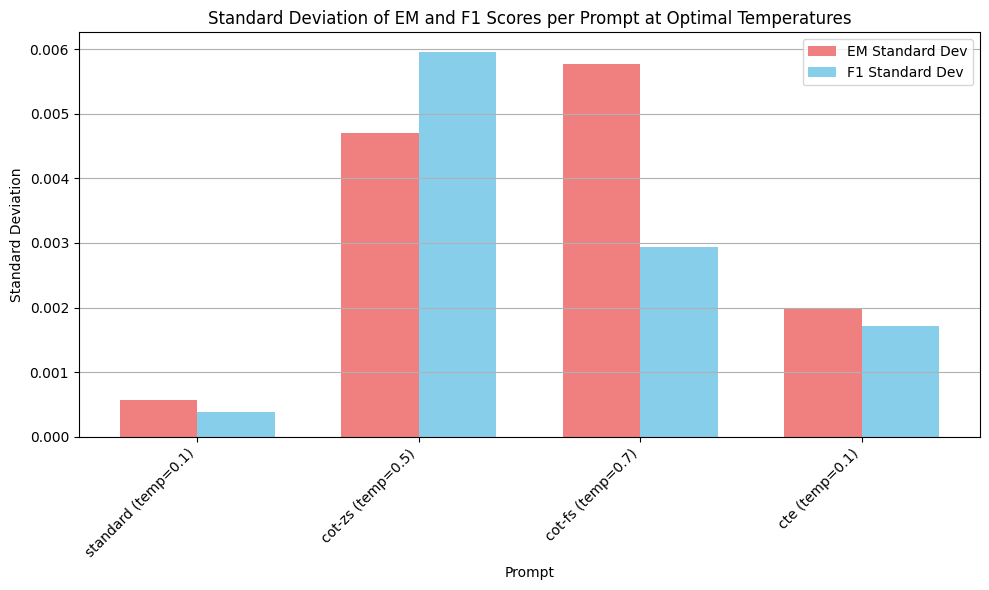

In [9]:
# Initialize an empty list to store stats
stats = []

# Loop through each prompt and its optimal temperature
for index, row in df_best_temp.iterrows():
    prompt = row['params.qa.prompt']
    optimal_temp = row['params.qa.temperature']
    
    # Select rows that correspond to the current prompt and its optimal temperature
    df_temp = df[(df['params.qa.prompt'] == prompt) & (df['params.qa.temperature'] == optimal_temp)]
    
    # Calculate stats for Exact Match and F1 scores
    em_std = df_temp['metrics.exact_match'].std()
    f1_std = df_temp['metrics.f1'].std()
    
    # Append to the list
    stats.append({
        'prompt': prompt,
        'optimal_temp': optimal_temp,
        'EM.std': em_std,
        'F1.std': f1_std
    })

# Convert the stats to a DataFrame
df_stats = pd.DataFrame(stats).set_index('prompt', drop=False).loc[['standard', 'cot-zs', 'cot-fs', 'cte']].copy()

# Combine prompt and optimal temperature for xticks
df_stats['prompt_with_temp'] = df_stats['prompt'] + " (temp=" + df_stats['optimal_temp'].astype(str) + ")"

# Plotting the stats of EM and F1 scores for each prompt
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for EM stats
bar_width = 0.35
index = np.arange(len(df_stats))

bar1 = ax.bar(index, df_stats['EM.std'], bar_width, label='EM Standard Dev', color='lightcoral')

# Bar plot for F1 stats, offset by bar_width for side-by-side bars
bar2 = ax.bar(index + bar_width, df_stats['F1.std'], bar_width, label='F1 Standard Dev', color='skyblue')

# Add labels and titles
ax.set_xlabel('Prompt')
ax.set_ylabel('Standard Deviation')
ax.set_title('Standard Deviation of EM and F1 Scores per Prompt at Optimal Temperatures')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(df_stats['prompt_with_temp'], rotation=45, ha='right')
ax.legend()

# Add a grid and display the plot
plt.grid(axis='y')
plt.tight_layout()
plt.show()
